1.Basic (head,tail,describe,info,dtypes) 
Shape of Dataframe 
Check Null values and deal with it 
Drop duplicats 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matches=pd.read_csv('matches.csv')

First 10 Rows Of Dataframe

In [3]:
matches.head(2)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri


Shape of The Dataframe

In [4]:
matches.shape

(1095, 20)

Columns Name

In [5]:
matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

Datatypes of Each Columns

In [6]:
matches.dtypes

id                   int64
season              object
city                object
date                object
match_type          object
player_of_match     object
venue               object
team1               object
team2               object
toss_winner         object
toss_decision       object
winner              object
result              object
result_margin      float64
target_runs        float64
target_overs       float64
super_over          object
method              object
umpire1             object
umpire2             object
dtype: object

Null Values in Every Columns

In [7]:
matches.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

Deal With Null Values

In [8]:
matches_null_city=matches.loc[matches.city.isnull()==True]

In [9]:
matches_null_city.head(2)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
399,729281,2014,NaN,2014-04-17,League,YS Chahal,Sharjah Cricket Stadium,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,8.0,146.0,20.0,N,NaN,Aleem Dar,S Ravi
402,729287,2014,NaN,2014-04-19,League,PA Patel,Dubai International Cricket Stadium,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,116.0,20.0,N,NaN,Aleem Dar,AK Chaudhary


In [10]:
matches_null_city.venue.value_counts()

venue
Dubai International Cricket Stadium    33
Sharjah Cricket Stadium                18
Name: count, dtype: int64

In [11]:
def city_null(row):
    if row.venue=='Dubai International Cricket Stadium':
        return 'Dubai'
    elif row.venue=='Sharjah Cricket Stadium':
        return 'Sharjah'
    else:
        return row.city

In [12]:
matches['city']=matches.apply(city_null,axis=1)

In [13]:
matches.city.isnull().sum()

0

In [14]:
matches['method'].value_counts()

method
D/L    21
Name: count, dtype: int64

In [15]:
matches.fillna({'method': 'No'},inplace=True)

In [16]:
matches['method'].isnull().sum()

0

Deal With Duplicate

In [17]:
matches.duplicated().sum()

0

2.Show dataframe for every year and do basic operation,shape of dataframe(take year input from user) 

In [18]:
matches_copy=matches

In [19]:
matches_copy.head(1)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,No,Asad Rauf,RE Koertzen


In [20]:
import datetime

In [21]:
matches_copy['date']=pd.to_datetime(matches['date'])
matches_copy['year']=matches_copy['date'].dt.year
matches_copy['month']=matches_copy['date'].dt.month
matches_copy['day']=matches_copy['date'].dt.day

In [22]:
matches_copy.head(1)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,year,month,day
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,140.0,223.0,20.0,N,No,Asad Rauf,RE Koertzen,2008,4,18


In [23]:
matches_copy.year.value_counts().sort_index()

year
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
2020    60
2021    60
2022    74
2023    74
2024    71
Name: count, dtype: int64

In [24]:
def basic_oper_yearwise():
    try:
        Year=int(input('Year='))
    except ValueError:
        print('Give integer input between 2008 to 2024')
        basic_oper_yearwise()
    else:
        if 2008<=Year<=2024:
            print(f'\033[1mHEAD OF THE DATASET ON YEAR {Year}:-\033[0m')
            display(matches_copy.loc[matches_copy['year']==Year].head(2))
            print(f'\033[1mTAIL OF THE DATASET ON YEAR {Year}:-\033[0m')
            display(matches_copy.loc[matches_copy['year']==Year].tail(2))
            print('\033[1mALL COLUMNS NAME:-\033[0m')
            display(matches_copy.columns)
            print(f'\033[1mSHAPE OF THE DATASET FOR YEAR {Year}:-\033[0m')
            display(matches_copy.loc[matches_copy['year']==Year].shape)
            print(f'\033[1mDESCRIBE ABOUT THE DATASET ON YEAR {Year}:-\033[0m')
            display(matches_copy.loc[matches_copy['year']==Year].describe())
            print(f'\033[1mINFORMATION ABOUT THE DATASET ON YEAR {Year}:-\033[0m')
            display(matches_copy.loc[matches_copy['year']==Year].info())
        else:
            print('Give input between 2008 to 2024')
            basic_oper_yearwise()

In [25]:
basic_oper_yearwise()

Year= 2008


HEAD OF THE DATASET ON YEAR 2008:-


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,year,month,day
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,140.0,223.0,20.0,N,No,Asad Rauf,RE Koertzen,2008,4,18
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,33.0,241.0,20.0,N,No,MR Benson,SL Shastri,2008,4,19


TAIL OF THE DATASET ON YEAR 2008:-


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,year,month,day
56,336039,2007/08,Mumbai,2008-05-31,Semi Final,M Ntini,Wankhede Stadium,Chennai Super Kings,Kings XI Punjab,Kings XI Punjab,...,9.0,113.0,20.0,N,No,Asad Rauf,DJ Harper,2008,5,31
57,336040,2007/08,Mumbai,2008-06-01,Final,YK Pathan,Dr DY Patil Sports Academy,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,...,3.0,164.0,20.0,N,No,BF Bowden,RE Koertzen,2008,6,1


ALL COLUMNS NAME:-


Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'year', 'month', 'day'],
      dtype='object')

SHAPE OF THE DATASET FOR YEAR 2008:-


(58, 23)

DESCRIBE ABOUT THE DATASET ON YEAR 2008:-


,id,date,result_margin,target_runs,target_overs,year,month,day
count,58.000000,58,58.000000,58.000000,58.000000,58.0,58.000000,58.000000
mean,336010.672414,2008-05-09 03:43:26.896551680,15.965517,159.775862,19.482759,2008.0,4.724138,17.413793
min,335982.000000,2008-04-18 00:00:00,1.000000,53.000000,8.000000,2008.0,4.000000,1.000000
25%,335996.250000,2008-04-28 06:00:00,5.000000,138.750000,20.000000,2008.0,4.000000,10.250000
50%,336010.500000,2008-05-08 12:00:00,8.000000,161.000000,20.000000,2008.0,5.000000,19.000000
75%,336024.750000,2008-05-19 18:00:00,11.500000,182.750000,20.000000,2008.0,5.000000,25.000000
max,336040.000000,2008-06-01 00:00:00,140.000000,241.000000,20.000000,2008.0,6.000000,31.000000
std,17.138638,NaN,24.619893,37.373902,2.265232,0.0,0.488216,8.973713


INFORMATION ABOUT THE DATASET ON YEAR 2008:-
<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 0 to 57
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               58 non-null     int64         
 1   season           58 non-null     object        
 2   city             58 non-null     object        
 3   date             58 non-null     datetime64[ns]
 4   match_type       58 non-null     object        
 5   player_of_match  58 non-null     object        
 6   venue            58 non-null     object        
 7   team1            58 non-null     object        
 8   team2            58 non-null     object        
 9   toss_winner      58 non-null     object        
 10  toss_decision    58 non-null     object        
 11  winner           58 non-null     object        
 12  result           58 non-null     object        
 13  result_margin    58 non-null     float64       
 14  targ

None

3.How many time a team play playoff 

In [26]:
matches_copy.match_type.value_counts()

match_type
League                1029
Final                   17
Qualifier 1             14
Qualifier 2             14
Eliminator              11
Semi Final               6
Elimination Final        3
3rd Place Play-Off       1
Name: count, dtype: int64

In [27]:
matches_copy.replace(to_replace='Elimination Final',value='Eliminator',inplace=True)

In [28]:
matches_copy.match_type.value_counts()

match_type
League                1029
Final                   17
Qualifier 1             14
Eliminator              14
Qualifier 2             14
Semi Final               6
3rd Place Play-Off       1
Name: count, dtype: int64

In [29]:
playoff_match_team1=matches_copy.loc[(matches_copy.match_type=='Semi Final') | (matches_copy.match_type=='Qualifier 1') | \
    (matches_copy.match_type=='Eliminator')].loc[:,['year','team1']]
playoff_match_team1['team']=playoff_match_team1['team1']
playoff_match_team1.drop('team1',axis=1,inplace=True)
playoff_match_team2=matches_copy.loc[(matches_copy.match_type=='Semi Final') | (matches_copy.match_type=='Qualifier 1') | \
    (matches_copy.match_type=='Eliminator')].loc[:,['year','team2']]
playoff_match_team2['team']=playoff_match_team2['team2']
playoff_match_team2.drop('team2',axis=1,inplace=True)
playoff_match_team=pd.concat([playoff_match_team1,playoff_match_team2],ignore_index=True)

In [30]:
def playoff_team():
    Year=input('Year=')
    if Year.lower()=='all':
        sns.countplot(data=playoff_match_team,y='team',orient='h')
    else:
        try:
            Year=int(Year)
        except ValueError:
            print('Give input years betwween 2008 to 2024 or all')
            playoff_team()
        else:
            if(2008<=Year<=2024):
                sns.countplot(data=playoff_match_team.loc[playoff_match_team['year']==Year],y='team',orient='h')
            else:
                print('Give input between 2008 to 2024')
                playoff_team()
    return 

Year= all


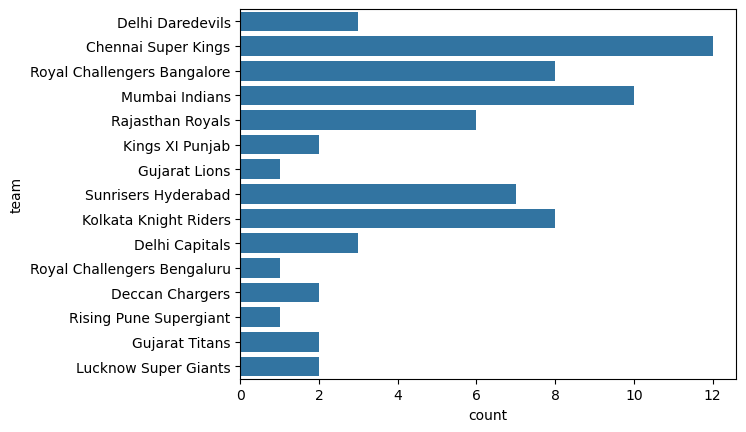

In [31]:
playoff_team()

4.How many time a team play final 

In [32]:
matches_copy.match_type.value_counts()

match_type
League                1029
Final                   17
Qualifier 1             14
Eliminator              14
Qualifier 2             14
Semi Final               6
3rd Place Play-Off       1
Name: count, dtype: int64

In [33]:
final_match_team1=matches_copy.loc[matches_copy.match_type=='Final'].loc[:,['year','team1']]
final_match_team2=matches_copy.loc[matches_copy.match_type=='Final'].loc[:,['year','team2']]
final_match_team1['team']=final_match_team1['team1']
final_match_team1.drop('team1',axis=1,inplace=True)
final_match_team2['team']=final_match_team2['team2']
final_match_team2.drop('team2',axis=1,inplace=True)
final_match_team=pd.concat([final_match_team1,final_match_team2],ignore_index=True)

In [34]:
def final_team():
    Year=input('Year=')
    if Year.lower()=='all':
        sns.countplot(data=final_match_team,y='team',orient='h')
    else:
        try:
            Year=int(Year)
        except ValueError:
            print('Choose all or integer year between 2008 to 2024')
            final_team()
        else:
            if 2008<=Year<=2024:
                sns.countplot(data=final_match_team.loc[final_match_team.year==Year],y='team',orient='h')
            else:
                print('Give input between 2008 to 2024')
                final_team()

Year= all


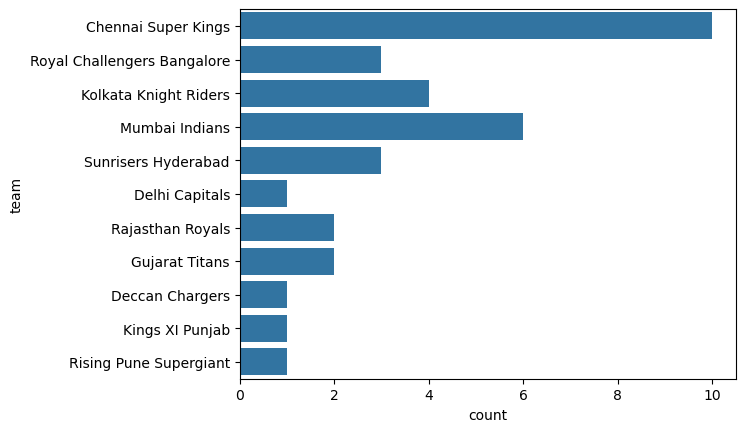

In [35]:
final_team()

5.How many time a team win final 

In [36]:
final_winner_team=matches_copy.loc[matches_copy.match_type=='Final'].loc[:,['year','winner']]
final_winner_team['index']=final_winner_team['year']
final_winner_team.set_index('index',inplace=True)

In [37]:
def final_winner():
    Year=input('Year=')
    if Year.lower()=='all':
        sns.countplot(data=final_winner_team,y='winner',orient='h')
    else:
        try:
            Year=int(Year)
        except ValueError:
            print('Choose all or integer year between 2008 to 2024')
            final_winner()
        else:
            if 2008<=Year<=2024:
                winner=final_winner_team.loc[2014,'winner']
                print(f'Year {Year} champion is {winner}')
            else:
                print('Give input between 2008 to 2024')
                final_winner()

Year= all


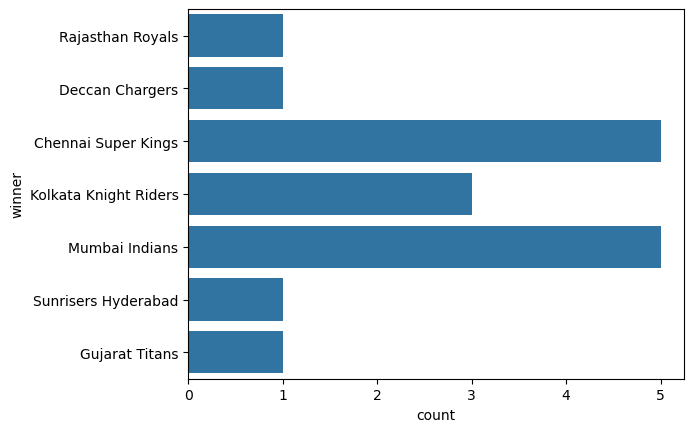

In [38]:
final_winner()

6.city wise player of the match 

In [39]:
matches_copy.city.value_counts()

city
Mumbai            173
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Bangalore          65
Chandigarh         61
Jaipur             57
Pune               51
Dubai              46
Abu Dhabi          37
Ahmedabad          36
Bengaluru          29
Sharjah            28
Durban             15
Visakhapatnam      15
Lucknow            14
Dharamsala         13
Centurion          12
Rajkot             10
Indore              9
Navi Mumbai         9
Johannesburg        8
Cuttack             7
Port Elizabeth      7
Ranchi              7
Cape Town           7
Raipur              6
Mohali              5
Kochi               5
Kanpur              4
Kimberley           3
East London         3
Guwahati            3
Nagpur              3
Bloemfontein        2
Name: count, dtype: int64

In [40]:
def city_wise_mvp():
    Set=set(matches_copy['city'])
    for st in Set:
        print(st,end=',')
    City=input('City=')
    if City in Set:
        height=max(0,min(1000,len(matches_copy.loc[matches_copy.city==City]['city'].value_counts())*10))
        plt.figure(figsize=(10,height))
        sns.countplot(data=matches_copy.loc[matches_copy.city==City],y='player_of_match',orient='h')
    else:
        print('\033[1mChoose city from the above list\033[0m')
        city_wise_mvp()

Visakhapatnam,Chandigarh,Chennai,Indore,Abu Dhabi,Pune,Johannesburg,Hyderabad,Kimberley,Rajkot,Ahmedabad,Bangalore,Cape Town,Delhi,Centurion,Lucknow,Guwahati,Port Elizabeth,Mohali,Kanpur,Ranchi,Raipur,Sharjah,Kochi,Navi Mumbai,Cuttack,East London,Dharamsala,Kolkata,Bloemfontein,Mumbai,Durban,Dubai,Jaipur,Nagpur,Bengaluru,

City= Kolkata


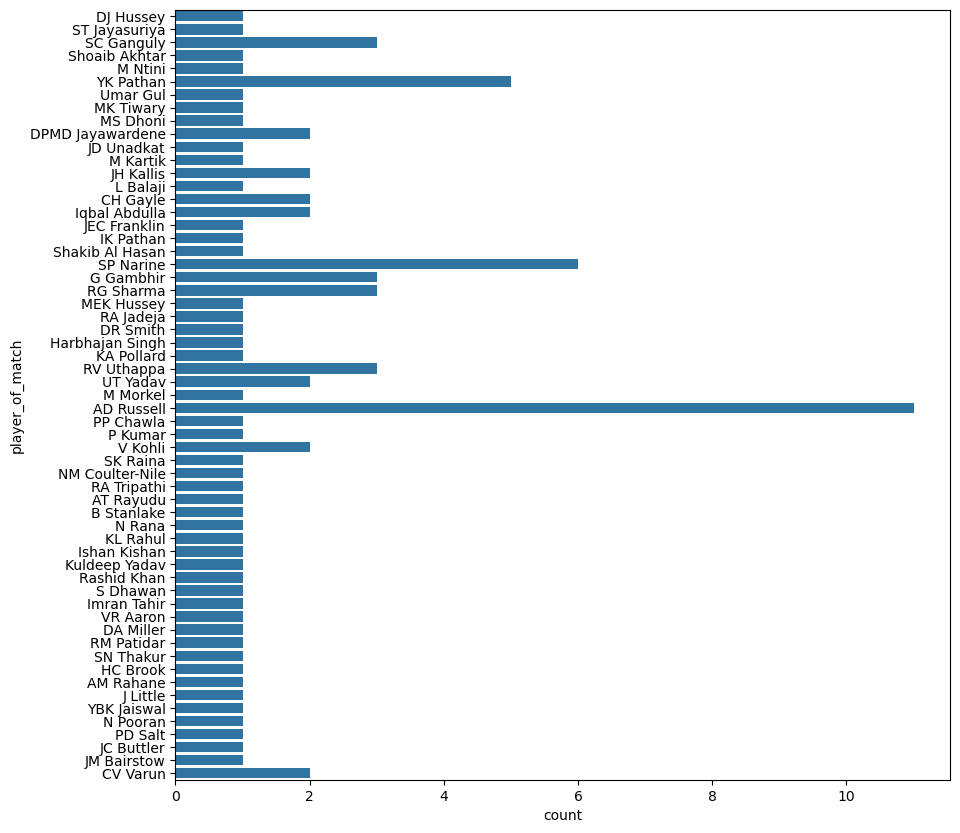

In [41]:
city_wise_mvp()

7.Year wise player of the match

In [42]:
def year_wise_mvp():
    Year=input('Year=')
    if Year.lower()=='all':
        height=max(5,min(50,len(matches_copy['player_of_match'].value_counts()*10)))
        plt.figure(figsize=(10,height))
        sns.countplot(data=matches_copy,y='player_of_match',orient='h',gap=0)
    else:
        try:
            Year=int(Year)
        except ValueError:
            print('\033[1mChoose between all or year 2008 to 2024\033[0m')
            year_wise_mvp()
        else:
            if 2008<=Year<=2024:
                height=max(5,min(20,len(matches_copy.loc[matches_copy['year']==Year]['player_of_match'].value_counts()*10)))
                plt.figure(figsize=(10,height))
                sns.countplot(data=matches_copy.loc[matches_copy['year']==Year],y='player_of_match',orient='h')
            else:
                print('\033[1mChoose between all or year 2008 to 2024\033[0m')
                year_wise_mvp()

Year= 2014


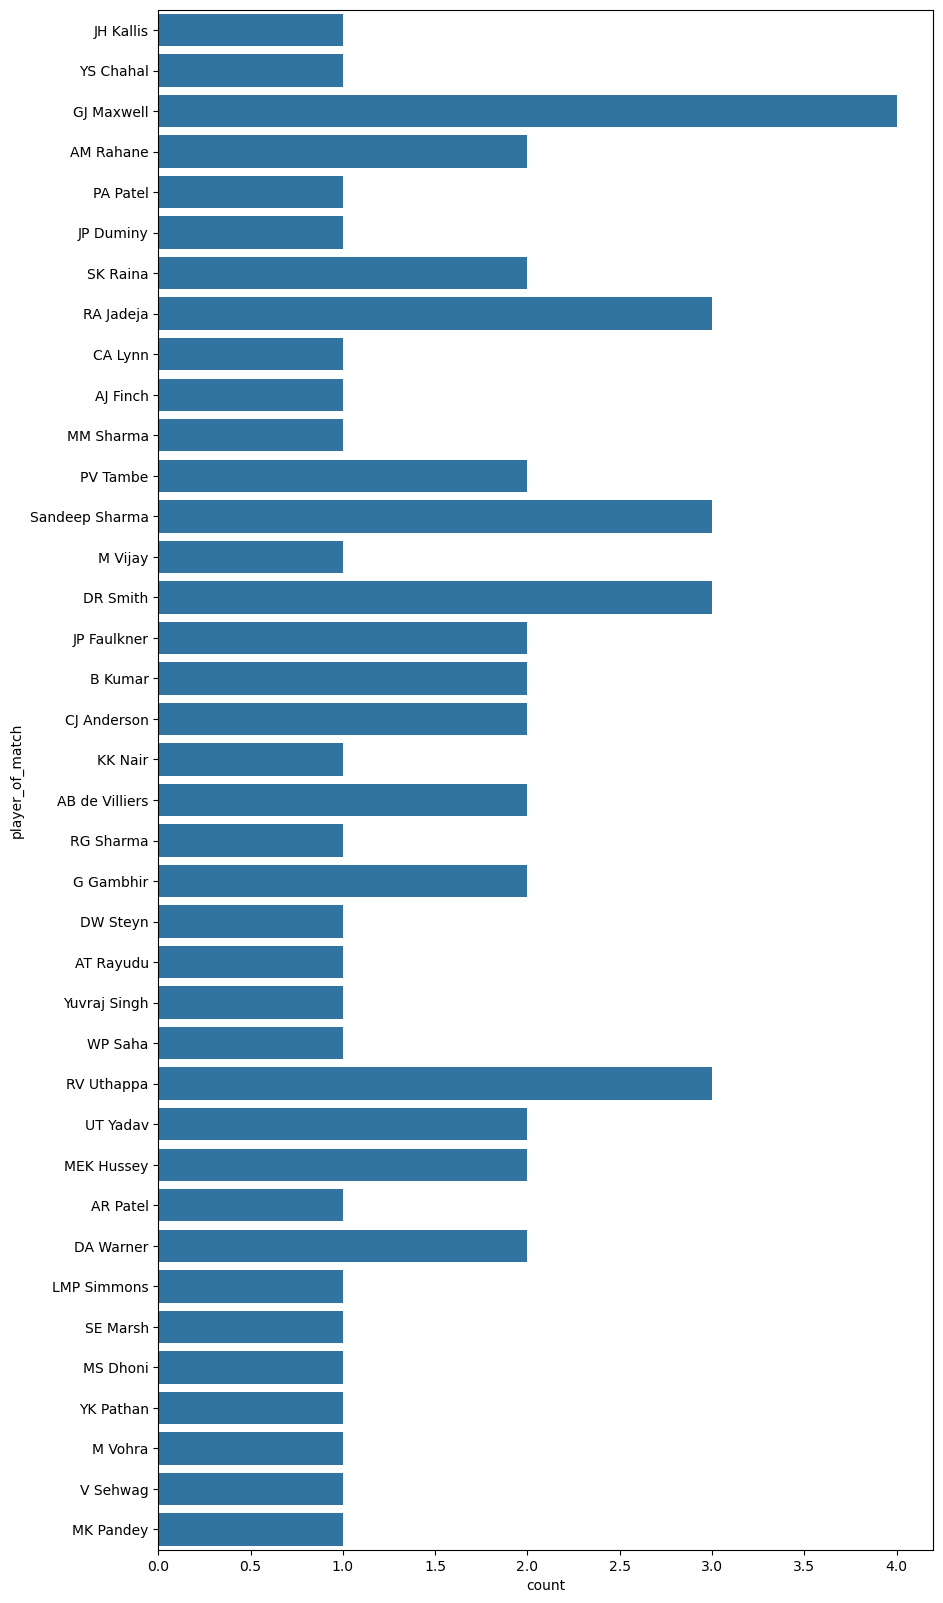

In [43]:
year_wise_mvp()

8.Year wise percentage of winning toss by a team 

In [44]:
winning_toss_team1=matches_copy.loc[:,['year','team1','toss_winner']]
winning_toss_team2=matches_copy.loc[:,['year','team2','toss_winner']]
winning_toss_team1['team']=winning_toss_team1['team1']
winning_toss_team2['team']=winning_toss_team2['team2']
winning_toss_team1.drop('team1',axis=1,inplace=True)
winning_toss_team2.drop('team2',axis=1,inplace=True)
winning_toss_team=pd.concat([winning_toss_team1,winning_toss_team2],ignore_index=True)

In [45]:
winning_toss_team

,year,toss_winner,team
0,2008,Royal Challengers Bangalore,Royal Challengers Bangalore
1,2008,Chennai Super Kings,Kings XI Punjab
2,2008,Rajasthan Royals,Delhi Daredevils
3,2008,Mumbai Indians,Mumbai Indians
4,2008,Deccan Chargers,Kolkata Knight Riders
...,...,...,...
2185,2024,Punjab Kings,Sunrisers Hyderabad
2186,2024,Sunrisers Hyderabad,Kolkata Knight Riders
2187,2024,Rajasthan Royals,Rajasthan Royals
2188,2024,Rajasthan Royals,Rajasthan Royals


In [46]:
winning_toss_team.loc[(winning_toss_team['toss_winner']=='Kings XI Punjab') & (winning_toss_team['year']==2008)]

,year,toss_winner,team
5,2008,Kings XI Punjab,Rajasthan Royals
17,2008,Kings XI Punjab,Deccan Chargers
20,2008,Kings XI Punjab,Kings XI Punjab
24,2008,Kings XI Punjab,Royal Challengers Bangalore
30,2008,Kings XI Punjab,Chennai Super Kings
46,2008,Kings XI Punjab,Kings XI Punjab
50,2008,Kings XI Punjab,Kolkata Knight Riders
56,2008,Kings XI Punjab,Chennai Super Kings
1100,2008,Kings XI Punjab,Kings XI Punjab
1112,2008,Kings XI Punjab,Kings XI Punjab


In [47]:
matches_copy.loc[matches_copy.year==2008]['team1'].value_counts()

team1
Chennai Super Kings            9
Royal Challengers Bangalore    7
Kings XI Punjab                7
Delhi Daredevils               7
Mumbai Indians                 7
Kolkata Knight Riders          7
Rajasthan Royals               7
Deccan Chargers                7
Name: count, dtype: int64

In [53]:
def year_wise_winning_toss(Year=None):
    if Year==None:
        Year=input('Year=')
    else:
        Year=str(Year)
    if Year.lower()=='all':
        Set=set(winning_toss_team['team'])
        for st in Set:
            print(st,end=',')
        Team=input('Team=')
        if Team in Set:
            z=len(matches_copy.loc[((matches_copy['team1']==Team) | (matches_copy['team2']==Team)) & (matches_copy['toss_winner']==Team)])/\
              len(matches_copy.loc[((matches_copy['team1']==Team) | (matches_copy['team2']==Team))])*100
            plt.pie(x=[z,100-z],labels=['Yes','No'],autopct='%1.1f%%')
        else:
            print('Choose Team from the above list')
            year_wise_winning_toss(Year)
    else:
        try:
            Year=int(Year) 
        except ValueError:
            print('Choose between all or 2008 to 2024')
            year_wise_winning_toss()
        else:
            if 2008<=Year<2024:
                Set=set(winning_toss_team.loc[winning_toss_team['year']==Year]['team'])
                for st in Set:
                    print(st,end=',')
                Team=input('Team=')    
                if Team in Set:
                    y=len(matches_copy.loc[((matches_copy['team1']==Team) | (matches_copy['team2']==Team)) & (matches_copy['toss_winner']==Team) & \
                      (matches_copy['year']==Year)])/len(matches_copy.loc[((matches_copy['team1']==Team) | (matches_copy['team2']==Team)) & \
                      (matches_copy['year']==Year)])*100
                    plt.pie(x=[y,100-y],labels=['Yes','No'],autopct='%1.1f%%')
                else:
                    print('Choose Team from the above list')
                    year_wise_winning_toss(Year)
            else:
                print('Choose between all or 2008 to 2024')
                year_wise_winning_toss()

Year= all


Rising Pune Supergiant,Pune Warriors,Rajasthan Royals,Kolkata Knight Riders,Chennai Super Kings,Lucknow Super Giants,Kochi Tuskers Kerala,Gujarat Titans,Rising Pune Supergiants,Deccan Chargers,Delhi Daredevils,Royal Challengers Bangalore,Delhi Capitals,Punjab Kings,Mumbai Indians,Royal Challengers Bengaluru,Kings XI Punjab,Gujarat Lions,Sunrisers Hyderabad,

Team= Kings XI Punjab


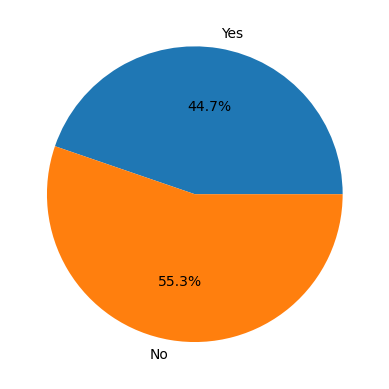

In [60]:
year_wise_winning_toss()

9.Year wise percentage of choosing bat and field 

In [57]:
def year_wise_toss_decision(Year=None):
    if Year==None:
        Year=input('Year=')
    else:
        Year=str(Year)
    if Year.lower()=='all':
        Set=set(winning_toss_team['team'])
        for st in Set:
            print(st,end=',')
        Team=input('Team=')
        if Team in Set:
            z=len(matches_copy.loc[(matches_copy['toss_winner']==Team) & (matches_copy['toss_decision']=='bat')])/\
              len(matches_copy.loc[matches_copy['toss_winner']==Team])*100
            plt.pie(x=[z,100-z],labels=['Bat','Field'],autopct='%1.1f%%')
        else:
            print('Choose Team from the above list')
            year_wise_winning_toss(Year)
    else:
        try:
            Year=int(Year) 
        except ValueError:
            print('Choose between all or 2008 to 2024')
            year_wise_winning_toss()
        else:
            if 2008<=Year<2024:
                Set=set(winning_toss_team.loc[winning_toss_team['year']==Year]['team'])
                for st in Set:
                    print(st,end=',')
                Team=input('Team=')    
                if Team in Set:
                    y=len(matches_copy.loc[(matches_copy['toss_winner']==Team) & (matches_copy['toss_decision']=='bat') & \
                      (matches_copy['year']==Year)])/len(matches_copy.loc[(matches_copy['toss_winner']==Team) & matches_copy['year']==Year])*100
                    plt.pie(x=[y,100-y],labels=['Bat','Field'],autopct='%1.1f%%')
                else:
                    print('Choose Team from the above list')
                    year_wise_winning_toss(Year)
            else:
                print('Choose between all or 2008 to 2024')
                year_wise_winning_toss()

Year= all


Rising Pune Supergiant,Pune Warriors,Rajasthan Royals,Kolkata Knight Riders,Chennai Super Kings,Lucknow Super Giants,Kochi Tuskers Kerala,Gujarat Titans,Rising Pune Supergiants,Deccan Chargers,Delhi Daredevils,Royal Challengers Bangalore,Delhi Capitals,Punjab Kings,Mumbai Indians,Royal Challengers Bengaluru,Kings XI Punjab,Gujarat Lions,Sunrisers Hyderabad,

Team= Kings XI Punjab


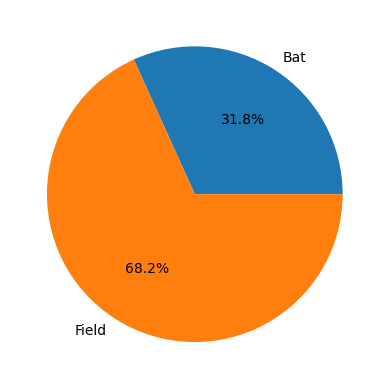

In [59]:
year_wise_toss_decision()

Total Match in Each Venue

In [15]:
matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [16]:
match_venue=matches.venue.value_counts()

In [17]:
match_venue

venue
Eden Gardens                                                             77
Wankhede Stadium                                                         73
M Chinnaswamy Stadium                                                    65
Feroz Shah Kotla                                                         60
Rajiv Gandhi International Stadium, Uppal                                49
MA Chidambaram Stadium, Chepauk                                          48
Sawai Mansingh Stadium                                                   47
Dubai International Cricket Stadium                                      46
Wankhede Stadium, Mumbai                                                 45
Punjab Cricket Association Stadium, Mohali                               35
Sheikh Zayed Stadium                                                     29
Sharjah Cricket Stadium                                                  28
MA Chidambaram Stadium, Chepauk, Chennai                                 28
Narend

How Many Matches Every Team Wins

In [18]:
matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [19]:
matches_winner=matches.winner.value_counts()

In [20]:
matches_winner

winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Kings XI Punjab                 88
Sunrisers Hyderabad             88
Delhi Daredevils                67
Delhi Capitals                  48
Deccan Chargers                 29
Gujarat Titans                  28
Lucknow Super Giants            24
Punjab Kings                    24
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Royal Challengers Bengaluru      7
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64

How Many Match Occured in Every City

In [21]:
match_city=matches.city.value_counts()

In [22]:
match_city

city
Mumbai            173
Kolkata            93
Delhi              90
Chennai            85
Hyderabad          77
Bangalore          65
Chandigarh         61
Jaipur             57
Pune               51
Dubai              46
Abu Dhabi          37
Ahmedabad          36
Bengaluru          29
Sharjah            28
Durban             15
Visakhapatnam      15
Lucknow            14
Dharamsala         13
Centurion          12
Rajkot             10
Indore              9
Navi Mumbai         9
Johannesburg        8
Cuttack             7
Port Elizabeth      7
Ranchi              7
Cape Town           7
Raipur              6
Mohali              5
Kochi               5
Kanpur              4
Kimberley           3
East London         3
Guwahati            3
Nagpur              3
Bloemfontein        2
Name: count, dtype: int64

How Many Every Types of Match Happend 

In [23]:
match_type=matches.match_type.value_counts()

In [24]:
match_type

match_type
League                1029
Final                   17
Qualifier 1             14
Qualifier 2             14
Eliminator              11
Semi Final               6
Elimination Final        3
3rd Place Play-Off       1
Name: count, dtype: int64

Who Win Most Player of The Match Award

In [25]:
matches.head(2)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri


In [26]:
most_time_player_of_match=matches.player_of_match.value_counts().max()

In [27]:
most_player_of_match=matches.player_of_match.value_counts().idxmax()

In [28]:
print(f'{most_player_of_match} win most player of the match award.He win {most_time_player_of_match} times')

AB de Villiers win most player of the match award.He win 25 times


Toss Winning Team How Many Time Choose Bat Or Field

In [29]:
matches.toss_decision.value_counts()

toss_decision
field    704
bat      391
Name: count, dtype: int64

How Many Matches Every Team Played

In [30]:
match_played=matches.team1.value_counts()+matches.team2.value_counts()

In [31]:
match_played=match_played.sort_values(ascending=False)

In [32]:
match_played

Mumbai Indians                 261
Kolkata Knight Riders          251
Royal Challengers Bangalore    240
Chennai Super Kings            238
Rajasthan Royals               221
Kings XI Punjab                190
Sunrisers Hyderabad            182
Delhi Daredevils               161
Delhi Capitals                  91
Deccan Chargers                 75
Punjab Kings                    56
Pune Warriors                   46
Gujarat Titans                  45
Lucknow Super Giants            44
Gujarat Lions                   30
Rising Pune Supergiant          16
Royal Challengers Bengaluru     15
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
Name: count, dtype: int64

Heighest Target By a Team

In [33]:
matches.target_runs.max()

288.0

In [34]:
highest_target_team=matches.loc[matches.target_runs==288]

In [35]:
highest_target_team

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
1053,1426268,2024,Bengaluru,2024-04-15,League,TM Head,"M Chinnaswamy Stadium, Bengaluru",Sunrisers Hyderabad,Royal Challengers Bengaluru,Royal Challengers Bengaluru,field,Sunrisers Hyderabad,runs,25.0,288.0,20.0,N,NaN,AK Chaudhary,R Pandit


In [36]:
matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [37]:
matches.super_over.value_counts()

super_over
N    1081
Y      14
Name: count, dtype: int64

In [38]:
matches.loc[matches.super_over=='Y']

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
66,392190,2009,Cape Town,2009-04-23,League,YK Pathan,Newlands,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,151.0,20.0,Y,NaN,MR Benson,M Erasmus
130,419121,2009/10,Chennai,2010-03-21,League,J Theron,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,137.0,20.0,Y,NaN,K Hariharan,DJ Harper
328,598004,2013,Hyderabad,2013-04-07,League,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,131.0,20.0,Y,NaN,AK Chaudhary,S Ravi
342,598017,2013,Bangalore,2013-04-16,League,V Kohli,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Royal Challengers Bangalore,tie,NaN,153.0,20.0,Y,NaN,M Erasmus,VA Kulkarni
416,729315,2014,Abu Dhabi,2014-04-29,League,JP Faulkner,Sheikh Zayed Stadium,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,153.0,20.0,Y,NaN,Aleem Dar,AK Chaudhary
475,829741,2015,Ahmedabad,2015-04-21,League,SE Marsh,"Sardar Patel Stadium, Motera",Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,tie,NaN,192.0,20.0,Y,NaN,M Erasmus,S Ravi
610,1082625,2017,Rajkot,2017-04-29,League,KH Pandya,Saurashtra Cricket Association Stadium,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,154.0,20.0,Y,NaN,AK Chaudhary,CB Gaffaney
705,1175365,2019,Delhi,2019-03-30,League,PP Shaw,Arun Jaitley Stadium,Kolkata Knight Riders,Delhi Capitals,Delhi Capitals,field,Delhi Capitals,tie,NaN,186.0,20.0,Y,NaN,AY Dandekar,Nitin Menon
746,1178426,2019,Mumbai,2019-05-02,League,JJ Bumrah,Wankhede Stadium,Mumbai Indians,Sunrisers Hyderabad,Mumbai Indians,bat,Mumbai Indians,tie,NaN,163.0,20.0,Y,NaN,CK Nandan,S Ravi
757,1216493,2020/21,Dubai,2020-09-20,League,MP Stoinis,Dubai International Cricket Stadium,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,field,Delhi Capitals,tie,NaN,158.0,20.0,Y,NaN,AK Chaudhary,Nitin Menon
